# Importing Libraries, Setting Path, Importing Data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
path = r'C:\Users\Chaot\Python stuff\06 - Utah Real Estate Housing Prices'
clean_cities = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', 'Utah Housing Datasets', 'cleaned_cities.csv'), index_col = False)
clean_cities

,zpid,city,state,zipcode,latitude,longitude,price,bathrooms,bedrooms,living_area,home_type,zestimate,country,tax_assessed_value,new_home,construction_type,home_detail_link
0,2072348967,Salt Lake City,UT,84106,40.705242,-111.85947,849000.0,2.0,3.0,2598.0,SINGLE_FAMILY,NaN,USA,NaN,NaN,NaN,https://www.zillow.com/homedetails/1108-E-Elgi...
1,72632530,West Valley City,UT,84128,40.675503,-112.04050,799999.0,5.0,5.0,5131.0,SINGLE_FAMILY,797800.0,USA,667700.0,NaN,NaN,https://www.zillow.com/homedetails/6261-W-Terr...
2,12815101,West Valley City,UT,84120,40.676613,-111.99914,510000.0,2.0,4.0,2072.0,SINGLE_FAMILY,521200.0,USA,380400.0,NaN,NaN,https://www.zillow.com/homedetails/4329-S-Mign...
3,12741992,West Valley City,UT,84119,40.715977,-111.93539,379888.0,1.0,3.0,925.0,SINGLE_FAMILY,387700.0,USA,299100.0,NaN,NaN,https://www.zillow.com/homedetails/2525-S-Lest...
4,12738716,Salt Lake City,UT,84104,40.753315,-111.91732,595000.0,2.0,3.0,2039.0,SINGLE_FAMILY,613200.0,USA,345300.0,NaN,NaN,https://www.zillow.com/homedetails/728-S-900-W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,345339765,Saratoga Springs,UT,84045,40.361380,-111.90911,874990.0,3.0,5.0,4848.0,SINGLE_FAMILY,844600.0,USA,NaN,True,BUILDER_SPEC,https://www.zillow.com/homedetails/318-E-Empir...
3755,345339767,Saratoga Springs,UT,84045,40.361362,-111.90856,824990.0,4.0,4.0,4806.0,SINGLE_FAMILY,817300.0,USA,NaN,True,BUILDER_SPEC,https://www.zillow.com/homedetails/378-E-Empir...
3756,347892730,Saratoga Springs,UT,84045,40.389470,-111.93355,525000.0,2.0,2.0,1523.0,TOWNHOUSE,528000.0,USA,NaN,True,NEW_CONSTRUCTION_TYPE_OTHER,https://www.zillow.com/homedetails/1497-N-Sara...
3757,348419124,Saratoga Springs,UT,84045,40.398994,-111.92335,448900.0,3.0,3.0,1570.0,TOWNHOUSE,NaN,USA,NaN,NaN,NaN,https://www.zillow.com/homedetails/164-W-Harve...


In [2]:
# Changing data types for columns.
clean_cities['price'] = clean_cities['price'].astype(int)
clean_cities['bedrooms'] = clean_cities['bedrooms'].fillna(0).astype(int)
clean_cities['bathrooms'] = clean_cities['bathrooms'].fillna(0).astype(int)
clean_cities['zestimate'] = clean_cities['zestimate'].fillna(0).astype(int)
clean_cities['tax_assessed_value'] = clean_cities['tax_assessed_value'].fillna(0).astype(int)
clean_cities['new_home'] = clean_cities['new_home'].fillna(False).astype(bool)
clean_cities['living_area'] = clean_cities['living_area'].fillna(0)
clean_cities['construction_type'] = clean_cities['construction_type'].fillna('Not new home').astype(str)

In [3]:
clean_cities

,zpid,city,state,zipcode,latitude,longitude,price,bathrooms,bedrooms,living_area,home_type,zestimate,country,tax_assessed_value,new_home,construction_type,home_detail_link
0,2072348967,Salt Lake City,UT,84106,40.705242,-111.85947,849000,2,3,2598.0,SINGLE_FAMILY,0,USA,0,False,Not new home,https://www.zillow.com/homedetails/1108-E-Elgi...
1,72632530,West Valley City,UT,84128,40.675503,-112.04050,799999,5,5,5131.0,SINGLE_FAMILY,797800,USA,667700,False,Not new home,https://www.zillow.com/homedetails/6261-W-Terr...
2,12815101,West Valley City,UT,84120,40.676613,-111.99914,510000,2,4,2072.0,SINGLE_FAMILY,521200,USA,380400,False,Not new home,https://www.zillow.com/homedetails/4329-S-Mign...
3,12741992,West Valley City,UT,84119,40.715977,-111.93539,379888,1,3,925.0,SINGLE_FAMILY,387700,USA,299100,False,Not new home,https://www.zillow.com/homedetails/2525-S-Lest...
4,12738716,Salt Lake City,UT,84104,40.753315,-111.91732,595000,2,3,2039.0,SINGLE_FAMILY,613200,USA,345300,False,Not new home,https://www.zillow.com/homedetails/728-S-900-W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,345339765,Saratoga Springs,UT,84045,40.361380,-111.90911,874990,3,5,4848.0,SINGLE_FAMILY,844600,USA,0,True,BUILDER_SPEC,https://www.zillow.com/homedetails/318-E-Empir...
3755,345339767,Saratoga Springs,UT,84045,40.361362,-111.90856,824990,4,4,4806.0,SINGLE_FAMILY,817300,USA,0,True,BUILDER_SPEC,https://www.zillow.com/homedetails/378-E-Empir...
3756,347892730,Saratoga Springs,UT,84045,40.389470,-111.93355,525000,2,2,1523.0,TOWNHOUSE,528000,USA,0,True,NEW_CONSTRUCTION_TYPE_OTHER,https://www.zillow.com/homedetails/1497-N-Sara...
3757,348419124,Saratoga Springs,UT,84045,40.398994,-111.92335,448900,3,3,1570.0,TOWNHOUSE,0,USA,0,False,Not new home,https://www.zillow.com/homedetails/164-W-Harve...


In [4]:
city_sub = clean_cities.drop(columns = ['city','state','home_type','country','new_home','construction_type',
                                        'home_detail_link','zpid','zipcode','latitude','longitude','zestimate',
                                       'tax_assessed_value'])
city_sub

,price,bathrooms,bedrooms,living_area
0,849000,2,3,2598.0
1,799999,5,5,5131.0
2,510000,2,4,2072.0
3,379888,1,3,925.0
4,595000,2,3,2039.0
...,...,...,...,...
3754,874990,3,5,4848.0
3755,824990,4,4,4806.0
3756,525000,2,2,1523.0
3757,448900,3,3,1570.0


# Elbow Technique.

In [5]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [6]:
score = [kmeans[i].fit(city_sub).score(city_sub) for i in range (len(kmeans))]
score

[-1.826718271525024e+16,
 -8187556404102952.0,
 -3783162825557459.5,
 -2702455927248329.0,
 -1796491630736000.8,
 -1042929487928201.4,
 -860237824841107.9,
 -717702772470444.0,
 -453276259240755.2]

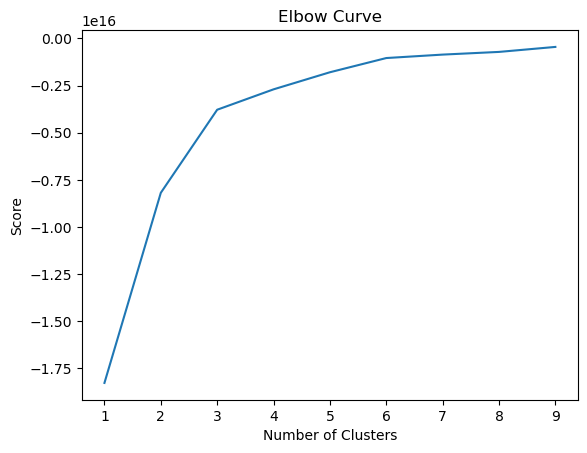

In [18]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
plt.savefig(os.path.join(path, 'Visualizations', 'Elbow Curve'),bbox_inches='tight')
pl.show()

# Creating K Means Clustering
From the above theres a small jump from 3 to 4, since the jump is so small, we can go with 3 clusters as there most likely won't be much of a difference with three.

In [8]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(city_sub)

KMeans(n_clusters=3)

In [9]:
city_sub['clusters'] = kmeans.fit_predict(city_sub)
city_sub

,price,bathrooms,bedrooms,living_area,clusters
0,849000,2,3,2598.0,0
1,799999,5,5,5131.0,0
2,510000,2,4,2072.0,0
3,379888,1,3,925.0,0
4,595000,2,3,2039.0,0
...,...,...,...,...,...
3754,874990,3,5,4848.0,0
3755,824990,4,4,4806.0,0
3756,525000,2,2,1523.0,0
3757,448900,3,3,1570.0,0


In [10]:
city_sub['clusters'].value_counts()

clusters
0    3485
2     258
1      16
Name: count, dtype: int64

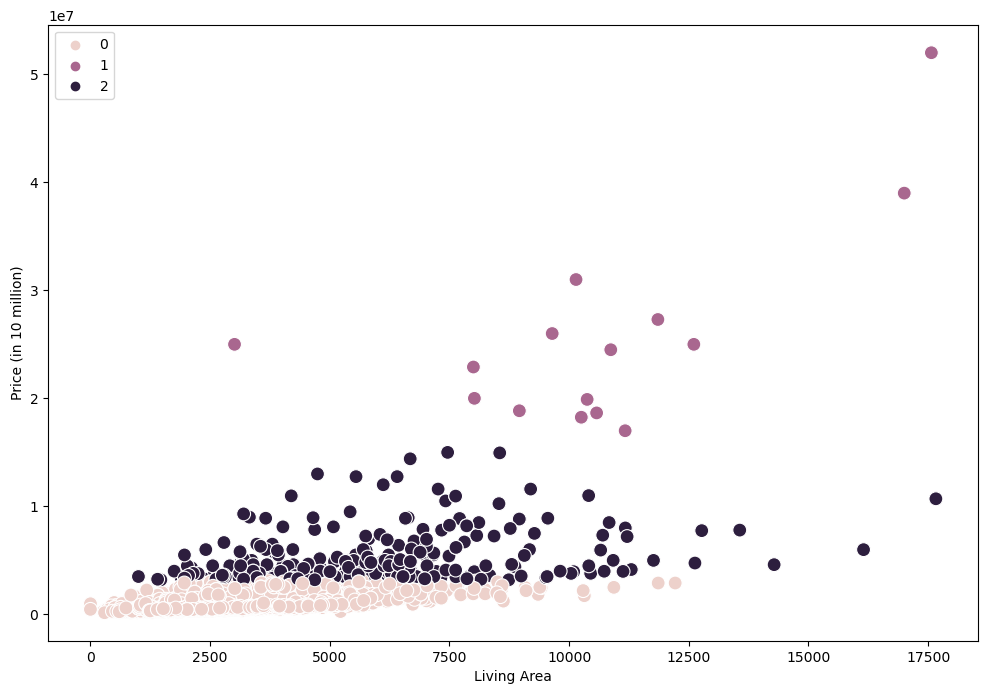

In [11]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=city_sub['living_area'], y=city_sub['price'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Living Area')
plt.ylabel('Price (in 10 million)')
plt.savefig(os.path.join(path, 'Visualizations', 'Price & Living Area Clusterplot'),bbox_inches='tight')
plt.show()

From the above scatterplot, it does appear that our dark purple seem to be the highest priced homes despite the living area size. This is very interesting as when we compare both the light link and normal pink colors, the normal pink seem to be quite tight and the light pink does have some stagnations from the group. I believe that these stagnations could also represent possible outliers for that group.

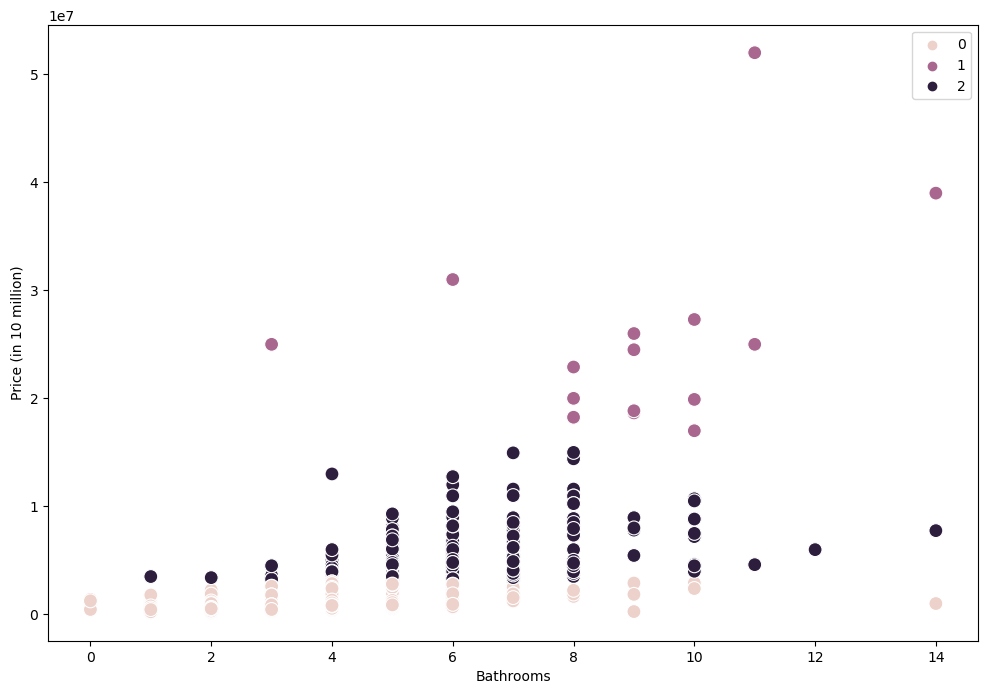

In [12]:
# Plot the clusters for the "Bathrooms" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=city_sub['bathrooms'], y=city_sub['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Bathrooms') 
plt.ylabel('Price (in 10 million)')
plt.savefig(os.path.join(path, 'Visualizations', 'Price & Bathroom Cluster'),bbox_inches='tight')
plt.show()

We once again see the purple be the highest price here. The unique thing about this here is that the normal pink is showing homes with up to 10 bathrooms, which from our initial testings in earlier exercises should have had a higher price. These homes all look like they're in the low hundred thousands though, as the price in our graph is in millions. The light pink homes look like they cover a range from low bathrooms to high bathrooms but seem to have a better price range.

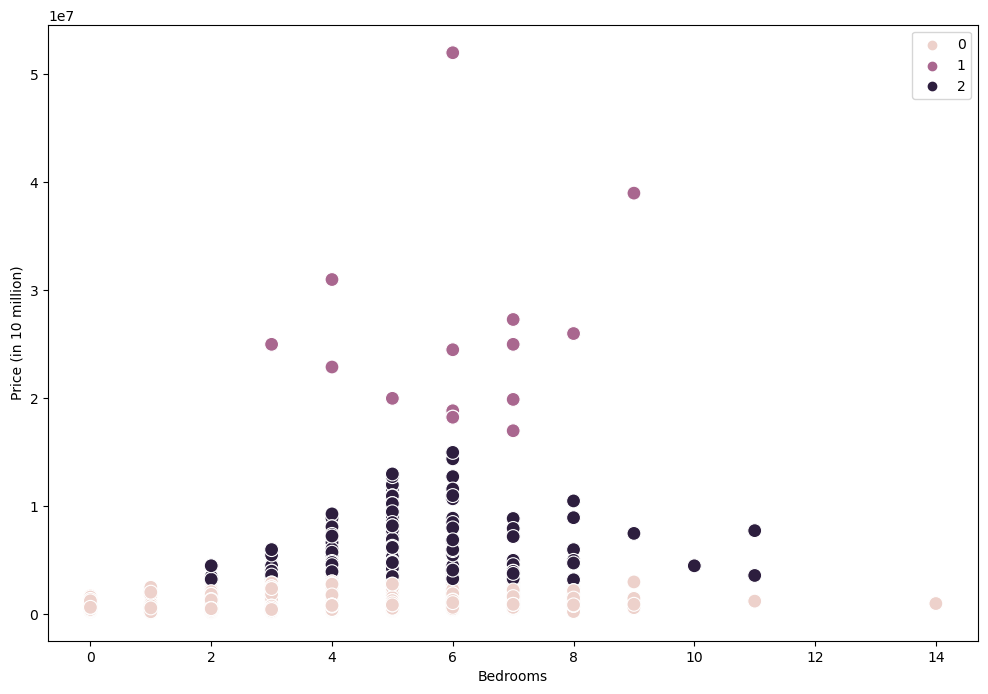

In [13]:
# Plot the clusters for the "Bedrooms" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=city_sub['bedrooms'], y=city_sub['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Bedrooms') 
plt.ylabel('Price (in 10 million)') 
plt.savefig(os.path.join(path, 'Visualizations', 'Price & Bedroom Cluster'),bbox_inches='tight')
plt.show()

From the above scatterplot, it does appear that our dark purple cluster seems to once again be the most expensive homes. This plot does mimic the above with price to bathroom ratio. Once again we are seeing our ranges of homes that have an extremely high amount of bedrooms seem to have a few outliers in both the light pink and darker pink. Both these colors though seem to have a good range in pricing though.

In [14]:
city_sub.loc[city_sub['clusters'] == 2, 'color'] = 'Purple'
city_sub.loc[city_sub['clusters'] == 1, 'color'] = 'Pink'
city_sub.loc[city_sub['clusters'] == 0, 'color'] = 'Light Pink'

In [16]:
city_sub.groupby('color').agg({'price':['mean', 'median'], 
                        'living_area':['mean', 'median'], 
                        'bathrooms':['mean', 'median'],
                        'bedrooms':['mean', 'median']})

price               living_area          bathrooms         \
                    mean      median          mean   median      mean median   
color                                                                          
Light Pink  8.041205e+05    630000.0   2766.507604   2468.0  3.024103    3.0   
Pink        2.522500e+07  23700000.0  10644.062500  10315.0  8.937500    9.0   
Purple      5.472896e+06   4600000.0   6099.441860   5874.5  5.980620    6.0   

            bedrooms         
                mean median  
color                        
Light Pink  3.804591    4.0  
Pink        6.062500    6.0  
Purple      4.961240    5.0

In [17]:
city_sub.to_csv(os.path.join(path,'Data Brief + Data Sets', 'Utah Housing Datasets','city_cluster.csv'),index=False)

# Propose what these results could be useful for in future steps of an analytics pipeline.


The above visualizations are great indicators of optional homes with different amount of bedrooms and bathrooms within reasonable pricing. We do see a bit if a correlation between all three visualizations, however, it does lead us to question about the unique cases of homes that have high pricing but appear to be typical houses. I believe the next step after these visualizations would be to investigate the special cases that are causing the house to show at high prices, which could possibly be due to location.